# Part 1: Setup and Data Loading

# Cell 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output

# Set up matplotlib to display plots inline in the notebook
%matplotlib inline

# Optional: Set a style for seaborn plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6] # Default figure size
plt.rcParams['figure.dpi'] = 100 # High resolution for plots

# Cell 2: Load the Dataset

Download: Go to Kaggle Titanic Dataset and download train.csv (this is the one with the Survived column). Place it in the same directory as your Jupyter notebook, or provide the full path.

In [3]:
try:
    df_train = pd.read_csv('train.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure it's in the correct directory.")
    # You might add code here to download it programmatically if you prefer

Dataset loaded successfully!


# Cell 3: Initial Data Inspection

In [4]:
print("First 5 rows of the dataset:")
display(df_train.head())

print("\nDataset Info:")
df_train.info()

print("\nDescriptive Statistics:")
display(df_train.describe(include='all')) # include='all' for both numerical and categorical

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descriptive Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Part 2: Data Cleaning and Preprocessing

# Cell 4: Handling Missing Values

In [5]:
print("Missing values before handling:")
display(df_train.isnull().sum())

# Age: Impute with median (less sensitive to outliers than mean)
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Embarked: Impute with mode (most frequent value)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# Cabin: Too many missing values, consider dropping or creating a 'HasCabin' feature
# For this project, let's simplify and just drop it.
# Or, a more advanced approach: df_train['HasCabin'] = df_train['Cabin'].notna().astype(int)
df_train.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after handling:")
display(df_train.isnull().sum())

Missing values before handling:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Missing values after handling:


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\675384461.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\675384461.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Cell 5: Feature Engineering / Transformation

In [6]:
# Create a new feature: FamilySize
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # +1 for the passenger themselves

# Create a new feature: IsAlone
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)

# Extract Title from Name
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Consolidate rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme']
df_train['Title'] = df_train['Title'].replace(rare_titles, 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

print("\nDataFrame after feature engineering:")
display(df_train.head())
print("\nValue counts for Title:")
print(df_train['Title'].value_counts())


DataFrame after feature engineering:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr



Value counts for Title:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Rare             26
the Countess      1
Name: count, dtype: int64


# Part 3: Exploratory Data Analysis (EDA) and Visualization

# Cell 6: Univariate Analysis - Target Variable

Survival Count:


Survived
0    549
1    342
Name: count, dtype: int64


Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\4048731646.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df_train, palette='viridis')


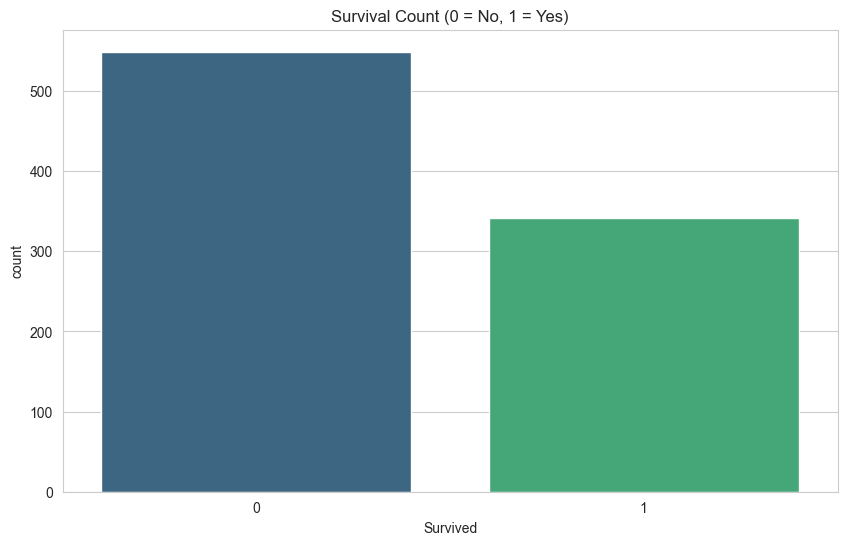

In [7]:
# Survival Count
print("Survival Count:")
display(df_train['Survived'].value_counts())
print("\nSurvival Rate:")
print(df_train['Survived'].value_counts(normalize=True) * 100)

# Plot Survival Count
sns.countplot(x='Survived', data=df_train, palette='viridis')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Cell 7: Bivariate Analysis - Survival by Categorical Features

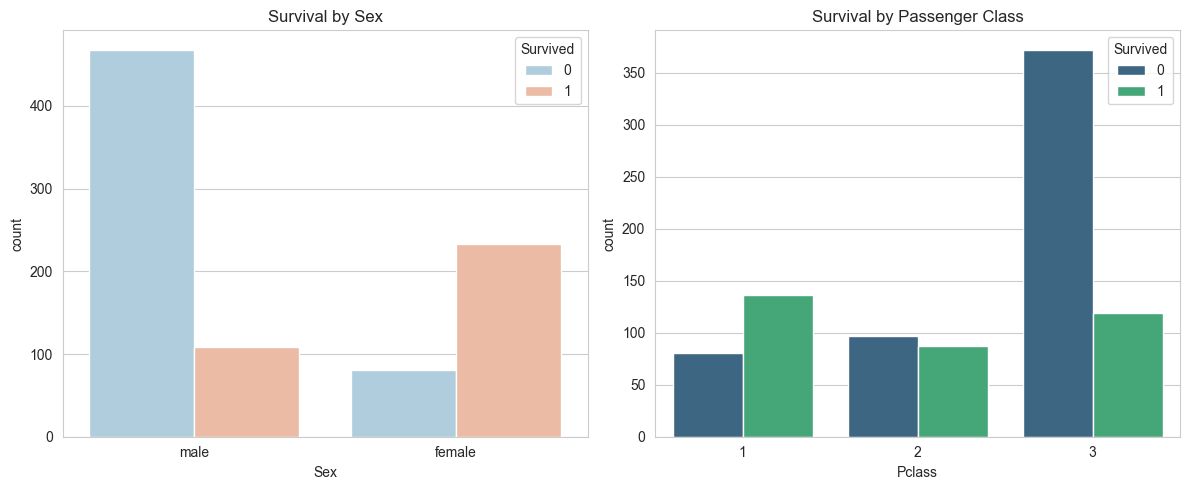


Survival Rate by Sex:


,Sex,Survived
0,female,0.742038
1,male,0.188908



Survival Rate by Pclass:


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363



Survival Rate by Title:


,Title,Survived
0,the Countess,1.000000
1,Mrs,0.792000
2,Miss,0.697802
3,Master,0.575000
4,Rare,0.423077
5,Mr,0.156673


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\961078797.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df_train, ci=None, palette='coolwarm')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\961078797.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df_train, ci=None, palette='coolwarm')


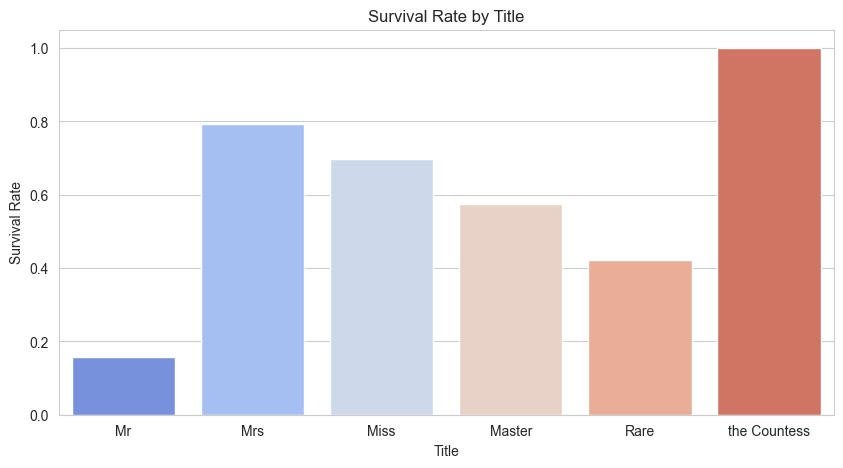

In [8]:
# Survival by Sex
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x='Sex', hue='Survived', data=df_train, palette='RdBu_r')
plt.title('Survival by Sex')

# Survival by Pclass
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.countplot(x='Pclass', hue='Survived', data=df_train, palette='viridis')
plt.title('Survival by Passenger Class')
plt.tight_layout()
plt.show()

# Survival Rate by Sex and Pclass (using crosstab and bar plot)
print("\nSurvival Rate by Sex:")
display(df_train.groupby('Sex')['Survived'].mean().reset_index())

print("\nSurvival Rate by Pclass:")
display(df_train.groupby('Pclass')['Survived'].mean().reset_index())

print("\nSurvival Rate by Title:")
display(df_train.groupby('Title')['Survived'].mean().sort_values(ascending=False).reset_index())

# Plot survival rate by Title (bar plot)
plt.figure(figsize=(10, 5))
sns.barplot(x='Title', y='Survived', data=df_train, ci=None, palette='coolwarm')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.show()

# Cell 8: Bivariate Analysis - Survival by Numerical Features

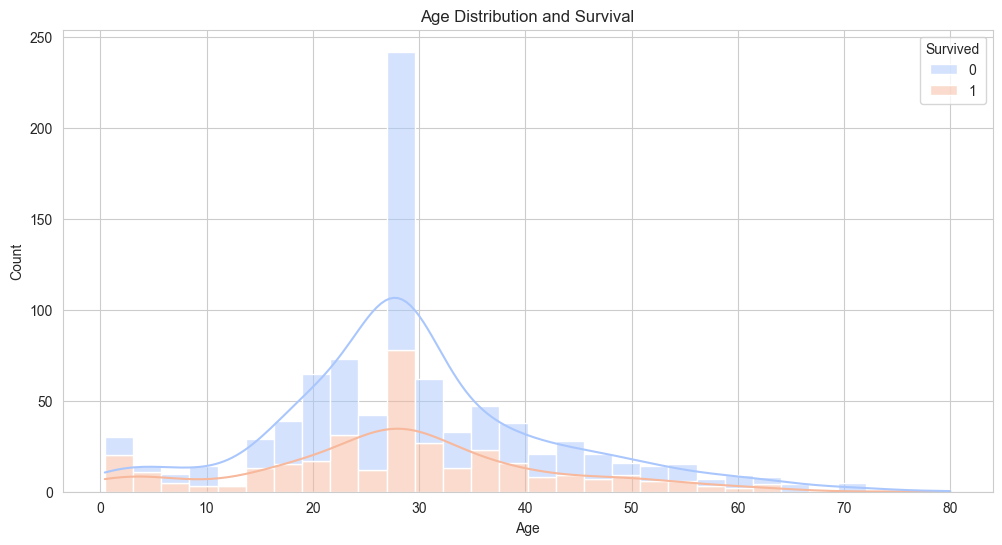

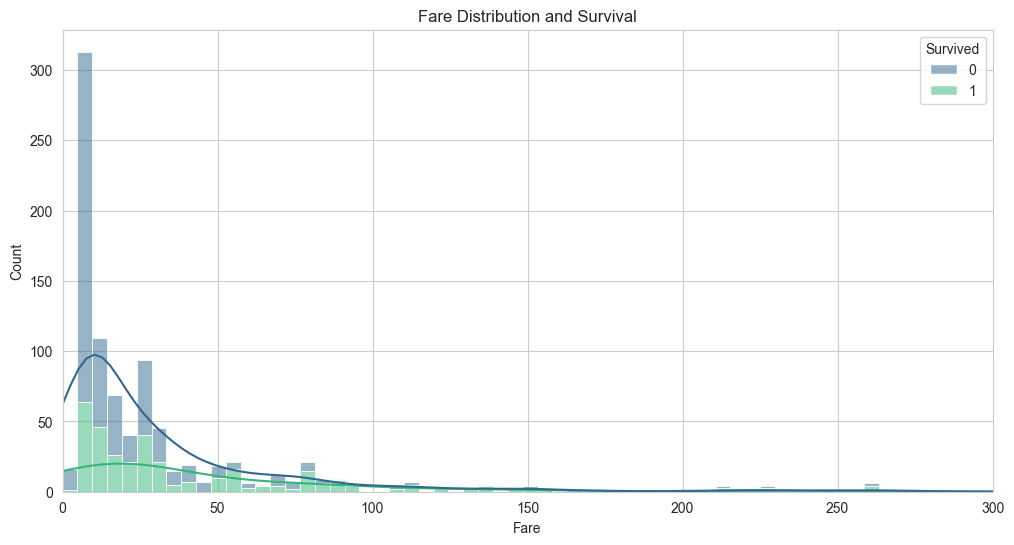

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\4222769424.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df_train, ci=None, palette='pastel')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\4222769424.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df_train, ci=None, palette='pastel')


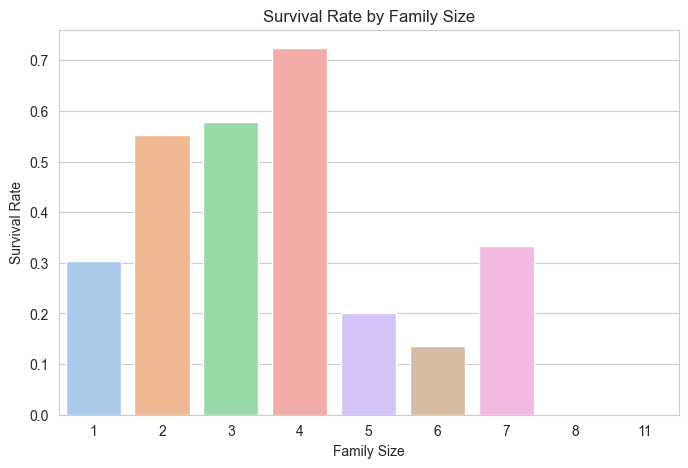

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\4222769424.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df_train, ci=None, palette='dark')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\4222769424.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df_train, ci=None, palette='dark')


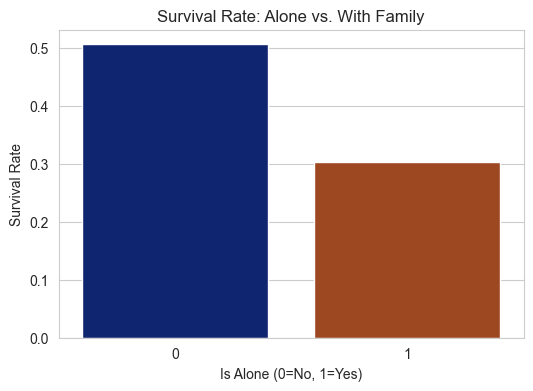

In [9]:
# Age Distribution (overall and by survival)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='Age', kde=True, hue='Survived', multiple="stack", palette='coolwarm')
plt.title('Age Distribution and Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare Distribution (overall and by survival)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='Fare', kde=True, hue='Survived', multiple="stack", palette='viridis')
plt.title('Fare Distribution and Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0, 300) # Limit x-axis for better visualization of main distribution
plt.show()

# Survival by FamilySize
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=df_train, ci=None, palette='pastel')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Survival by IsAlone
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=df_train, ci=None, palette='dark')
plt.title('Survival Rate: Alone vs. With Family')
plt.xlabel('Is Alone (0=No, 1=Yes)')
plt.ylabel('Survival Rate')
plt.show()

# Part 4: Advanced Visualizations & Interactive Elements (Ipywidgets)

# Cell 9: Pairplot for key features (Advanced Visualization)

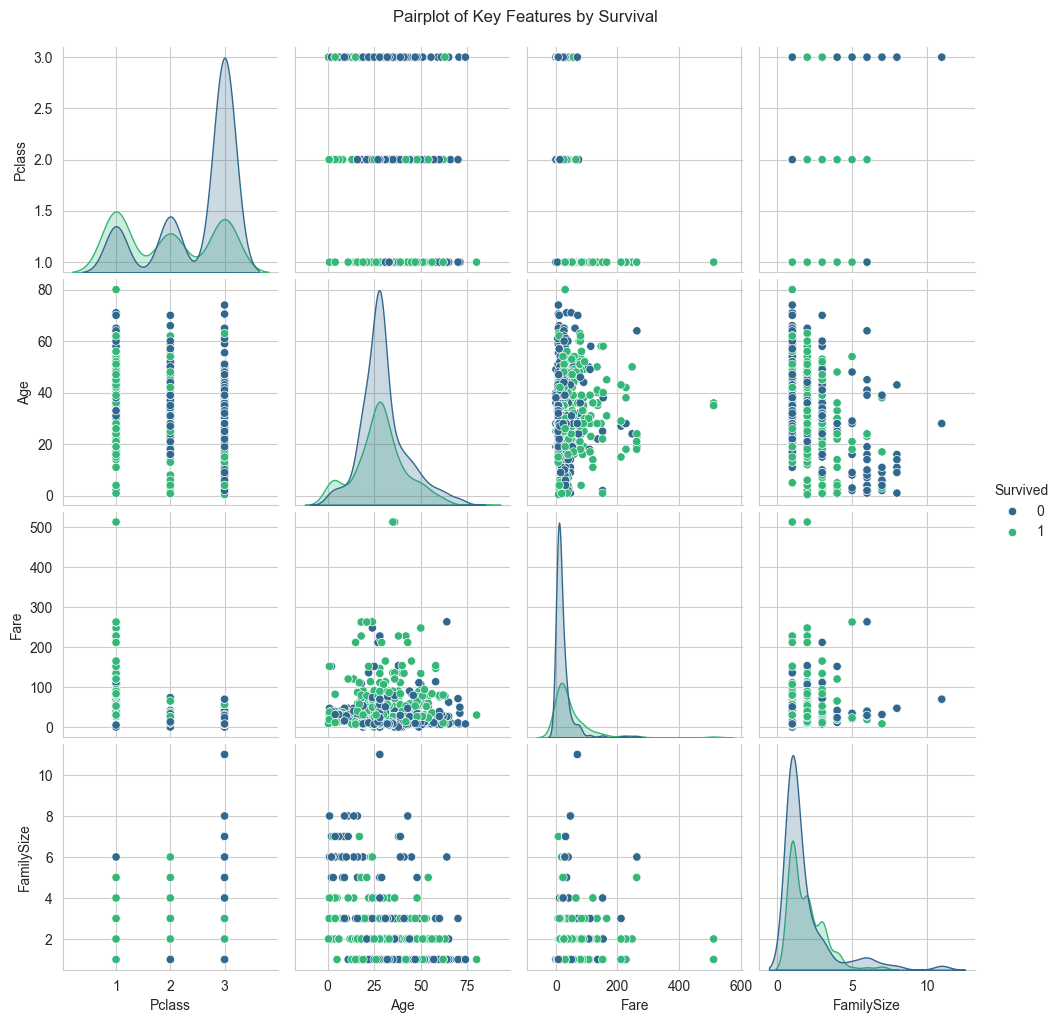

In [10]:
# A pairplot shows relationships between numerical variables and distributions
# It can take a while to run on large datasets
sns.pairplot(df_train[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Key Features by Survival', y=1.02) # Adjust title position
plt.show()

# Cell 10: Interactive Age/Fare Distribution with ipywidgets

In [11]:
# This cell leverages ipywidgets for interactivity

def plot_age_fare_dist(min_age, max_age, max_fare):
    filtered_df = df_train[(df_train['Age'] >= min_age) & (df_train['Age'] <= max_age) & (df_train['Fare'] <= max_fare)]
    
    if filtered_df.empty:
        print("No data for the selected range.")
        return

    plt.figure(figsize=(12, 6))
    sns.histplot(data=filtered_df, x='Age', kde=True, hue='Survived', multiple="stack", palette='coolwarm')
    plt.title(f'Age Distribution for Ages {min_age}-{max_age} and Fare up to {max_fare}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(data=filtered_df, x='Fare', kde=True, hue='Survived', multiple="stack", palette='viridis')
    plt.title(f'Fare Distribution for Ages {min_age}-{max_age} and Fare up to {max_fare}')
    plt.xlabel('Fare')
    plt.ylabel('Count')
    plt.show()

print("Interact with Age and Fare filters to explore distributions:")
interact(plot_age_fare_dist,
         min_age=(0, 80, 5),
         max_age=(0, 80, 5),
         max_fare=(0, 500, 50));

Interact with Age and Fare filters to explore distributions:


interactive(children=(IntSlider(value=40, description='min_age', max=80, step=5), IntSlider(value=40, descript…

# Part 5: Insights and Conclusion

# Cell 11: Summarize

# 📊 Key Insights from Titanic Exploratory Data Analysis

Based on our exploratory data analysis, here are the primary insights derived from the Titanic dataset:

## 1. Gender Disparity in Survival
* **A stark difference was observed in survival rates between genders.** Females had a significantly higher survival probability compared to males. This suggests that "women and children first" was likely a guiding principle during the evacuation.

## 2. Impact of Passenger Class
* **Passenger Class (Pclass) played a crucial role in survival.** First-class passengers had the highest survival rates, followed by second-class, and then third-class passengers. This highlights the socio-economic disparities influencing survival chances.

## 3. Age and Survival
* **Age distribution shows varying survival patterns.** Very young children (e.g., under 10) had a relatively higher survival rate, possibly due to prioritization during rescue. Conversely, some older age groups, particularly adult males, exhibited lower survival rates. The median age imputation should be noted when interpreting precise age-related insights.

## 4. Fare and Survival
* **Higher fares correlated with better survival rates.** This is likely intertwined with passenger class, as higher fares correspond to first and second-class tickets, which offered better access to lifeboats and higher decks.

## 5. Family Size and Solitude
* **Family size significantly influenced survival.** Passengers who were entirely alone (FamilySize = 1) or those with very large families (e.g., FamilySize > 4) tended to have lower survival rates. Passengers with small to medium-sized families (2-4 members) appeared to have slightly better chances. This suggests that having some family support but not being overwhelmed by too many dependents was beneficial.

## 6. Title and Social Standing
* **Titles extracted from names provided insights into social standing and survival.** Those with titles indicating higher social status (e.g., 'Master', 'Mrs.') generally had better survival rates than common titles like 'Mr.'. This reinforces the notion of social hierarchy affecting rescue efforts.

---

**In conclusion, survival on the Titanic was not random but was heavily influenced by factors such as gender, socio-economic status (implied by Pclass and Fare), age, and the dynamics of family presence.** This EDA provides a strong foundation for understanding the factors that contributed to who survived the disaster.